In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
# from urllib.parse import urlparse

# import pysift

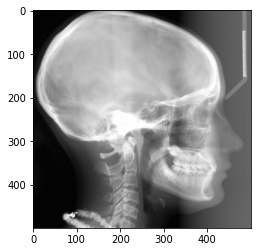

In [6]:
path = './skull.jpg'
imgOG = cv2.imread(path)
imgOG = cv2.cvtColor(imgOG, cv2.COLOR_BGR2GRAY)
width = height = 500
imgOG = cv2.resize(imgOG, (width, height))
plt.imshow(imgOG, cmap='gray')

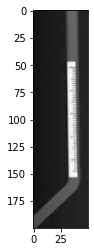

In [23]:
# remember u input the y first then the x
img_roi = imgOG[0:200, width-50-1:width-1]
plt.imshow(img_roi, cmap='gray')

---

In [24]:
img_new = img_roi.copy()
gray = cv2.GaussianBlur(img_new, (7, 7), 0)
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=4)
edged = cv2.erode(edged, None, iterations=4)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
boundRect = [None]*len(contours)

for i, c in enumerate(contours):
    contours_poly = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly)

print(boundRect)

[(31, 47, 9, 107)]


In [25]:
x2 = int(boundRect[0][0]+boundRect[0][2])
y2 = int(boundRect[0][1]+boundRect[0][3])
x1 = int(boundRect[0][0])
y1 = int(boundRect[0][1])

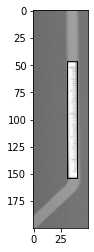

In [26]:


cv2.rectangle(
    img_new, 
    (int(boundRect[0][0]), int(boundRect[0][1])), 
    (int(boundRect[0][0]+boundRect[0][2]), int(boundRect[0][1]+boundRect[0][3])), 
    (0,0,0), 1
    # (255,255,255), -1
)

plt.imshow(img_new, cmap='gray')

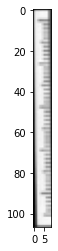

In [27]:
img_new = img_roi.copy()
crop = img_new[y1:y2, x1:x2]
plt.imshow(crop, cmap='gray')

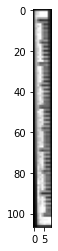

In [28]:
hist = cv2.equalizeHist(crop)
plt.imshow(hist, cmap='gray')

In [30]:
crop.shape

(107, 9)

In [40]:
# PIXEL-MILLIMETER-RATIO
loc0 = 5
loc9 = 100
pmr = 45 / np.abs(loc0 - loc9)
pmr = np.round(pmr, 2)
print('every pixel corresponds to roughly {} mm '.format(pmr))

every pixel corresponds to roughly 0.47 mm 


---

**NOTE**  
in our dataset _'cepha400'_, the ruler has 9 stripes instead of 10, thus corresponding to 40mm instead of 45mm

---

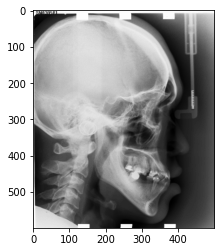

In [46]:
path = '../data/cepha400/001.jpg'
imgOG = cv2.imread(path)
imgOG = cv2.cvtColor(imgOG, cv2.COLOR_BGR2GRAY)
width, height = 500, 600
imgOG = cv2.resize(imgOG, (width, height))
plt.imshow(imgOG, cmap='gray')

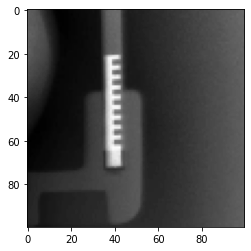

In [53]:
img_roi = imgOG[200:int(height/2), width-100-1:width-1]
plt.imshow(img_roi, cmap='gray')

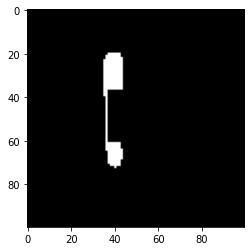

In [90]:
img_new = img_roi.copy()
gray = cv2.GaussianBlur(img_new, (7, 7), 0)
edged = cv2.Canny(gray, 170, 200)
edged = cv2.dilate(edged, None, iterations=4)
edged = cv2.erode(edged, None, iterations=4)
plt.imshow(edged, cmap='gray')

In [91]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
boundRect = [None]*len(contours)

for i, c in enumerate(contours):
    contours_poly = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly)

print(boundRect)

[(36, 20, 8, 53)]


In [92]:
x2 = int(boundRect[0][0]+boundRect[0][2])
y2 = int(boundRect[0][1]+boundRect[0][3])
x1 = int(boundRect[0][0])
y1 = int(boundRect[0][1])

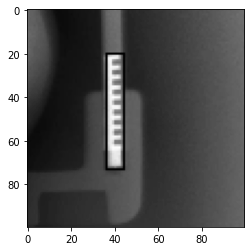

In [93]:
cv2.rectangle(
    img_new, 
    (int(boundRect[0][0]), int(boundRect[0][1])), 
    (int(boundRect[0][0]+boundRect[0][2]), int(boundRect[0][1]+boundRect[0][3])), 
    (0,0,0), 1
    # (255,255,255), -1
)

plt.imshow(img_new, cmap='gray')

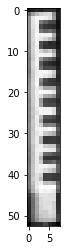

In [94]:
img_crop = img_roi.copy()
img_crop = img_crop[y1:y2, x1:x2]
plt.imshow(img_crop, cmap='gray')

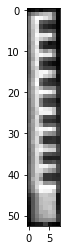

In [95]:
img_hist = cv2.equalizeHist(img_crop)
plt.imshow(img_hist, cmap='gray')

In [96]:
# PIXEL-MILLIMETER-RATIO
loc0 = 5
loc8 = 40
pmr = 40 / np.abs(loc0 - loc8)
pmr = np.round(pmr, 2)
print('every pixel corresponds to roughly {} mm '.format(pmr))

every pixel corresponds to roughly 1.14 mm 
